In [69]:
from enum import Enum
import math
import random

class Direction(Enum):
    NORTH = -1, 0 
    SOUTH = 1, 0
    EAST = 0, 1
    WEST = 0,-1
    # NORTHEAST =
    # SOUTHEAST = 1,1
    # SOUTHWEST = 
    # NORTHWEST =

In [70]:
#defining agent class
class Agent:
        def __init__(self,name):
            self.energy = 10
            self.sight = random.randint(2,5)
            self.name = name
            self.pos = None
            self.vision = {}
            self.listVision = []
            self.detail = ""
        
        def move(self):
            loc = self.whereTo()
            if loc:
                world.grid[self.pos[0]][self.pos[1]] = None
                world.grid[loc[0]][loc[1]] = self
                self.updateEnergy(loc)
                self.vision = {}
                self.pos = loc
  
    
        def updateEnergy(self, loc):
            if loc in world.sugar:
                self.energy += world.sugar[loc]
                world.reduceSugar(loc)
            
            self.detail += f"Agent's Energy: {self.energy}\n"
            self.detail += f'sugar Level: {world.sugar[loc]}\n'

        def whereTo(self):
            self.computeVision()
            vision_sugar = {}
            
            for key in self.vision:
                if key in world.sugar and (self.isFree(key) or key == self.pos):
                    vision_sugar[key] = world.sugar[key]  
            try:
                max_vision = max(vision_sugar, key=vision_sugar.get)
                max_visions = [key for key, value in vision_sugar.items() if value == vision_sugar[max_vision]]
                rand = random.randint(0, len(max_visions)-1)
                max_vision = max_visions[rand]

                self.detail += f'vision_sugar: {vision_sugar} - length: {len(vision_sugar)}\n'
                self.detail += f'next move: {max_vision}\n'
                return max_vision
            except ValueError:
                return None
        
        def isFree(self, loc):
            if world.grid[loc[0]][loc[1]] == None:
                return True
            return False
        
        def computeVision(self):
            whereTo = self.pos
            self.vision[whereTo] = world.grid[whereTo[0]][whereTo[1]]
            self.listVision.append(world.grid[whereTo[0]][whereTo[1]])
            
            for direction in Direction:
                for i in range (self.sight):
                    whereTo = tuple((x + y)%20 for x, y in zip(whereTo, direction.value))
                    self.vision[whereTo] = world.grid[whereTo[0]][whereTo[1]]
                    self.listVision.append(world.grid[whereTo[0]][whereTo[1]])
                whereTo = self.pos

            self.detail += f'vision range: {self.vision} - length: {len(self.vision)}\n'

        def metabolism(self):
            if self.energy > 0:
                self.energy -= 1
            
            #agent dies
            if not self.energy:
                world.grid[self.pos[0]][self.pos[1]] = None
                world.agents.remove(self)
        
        def reproduce(self):
            self.computeVision()
        
        
        def show_details(self):
            self.detail = ""
            self.detail += f'agent: {self.name}\n'
            self.detail += f'current position: {self.pos}\n'
            #self.computeVision()
            self.whereTo()
            
            print(self.detail)


#creating agents objects
agents = []
for i in range(20):
    agent = Agent('Agent'+str(i+1))
    agents.append(agent)

class GridWorld:
    def __init__(self):
        self.capacity = {}
        self.sugar = {}
        self.grid = None
        self.size = 20,20 #A 20X20 grid world
        self.detail = ""
        self.createWorld()
        self.placeAgent(agents)
        self.agents = agents
    

    #Create the world
    def createWorld(self):
        self.grid = []
        for row in range(self.size[0]):
            self.grid.append([])
            for col in range(self.size[1]):
                self.grid[row].append(None)
                self.capacity[(row, col)] = row+col
                self.sugar[(row, col)] = row+col
                        
        self.detail += f'sugar: {self.sugar}\n'
        self.detail += f'capacity: {self.capacity}\n'

    #put agents in the world randomly
    def placeAgent(self, agents):
        for agent in agents:
            rand = random.randint(0, self.size[0]-1), random.randint(0, self.size[1]-1)
            while self.grid[rand[0]][rand[1]] != None:
                rand = random.randint(0, self.size[0]-1), random.randint(0, self.size[1]-1)
            self.grid[rand[0]][rand[1]] = agent
            agent.x, agent.y = rand[0], rand[1]
            agent.pos = agent.x, agent.y

    def reduceSugar(self, loc):
        self.sugar[loc] = 0


    #display the world
    def show_world(self):
        print()
        for row in self.grid:
            for obj in  row:
                print('[', end='')
                if obj == None:
                    print('  ', end='')
                else: #type(obj) == type(Agent):
                    if len(obj.name[5:]) == 1:
                        print(str(0)+obj.name[5:], end='')
                    if len(obj.name[5:]) == 2:
                        print(obj.name[5:], end='')

                print(']', end=' ')
            print()
    #return the size of the world
    def getSize(self):
        return self.size
    
print("Initial world")
world = GridWorld()#create a new world
# world.show_world() # display the new world upon creation

Initial world


Surgar Growth Phase

In [71]:
def sugarGrowth():
    for key in world.sugar:
        world.sugar[key]  += 1
        if world.sugar[key] > world.capacity[key]:
            world.sugar[key] = world.capacity[key]

Movement Phase

In [72]:
def movement():
    random.shuffle(world.agents) #shuffles the list of agent randomly
    for agent in world.agents:
        agent.move()
       

Compsumption Phase

In [73]:
def metabolism():
    for agent in world.agents:
        agent.metabolism()


SIMULATION FOR PART 1

In [74]:
import csv
import random
import matplotlib.pyplot as plt

gents = world.agents
sum_energy = []
turn = []
turn_150500 = []
pos = []
sugar_level = []


for i in range(500):
    sugarGrowth()
    movement()
    metabolism()
    
    turn.append(i+1)
    total = 0
    for agent in world.agents:
        total += agent.energy
    sum_energy.append(total)

    if i+1 == 1:
        for agent in world.agents:
            pos.append(agent.pos)
        for sugar in world.sugar:
            sugar_level.append(world.sugar[sugar])

    elif i+1 == 50:
        for agent in world.agents:
            pos.append(agent.pos)
        for sugar in world.sugar:
            sugar_level.append(world.sugar[sugar])
    elif i+1 == 500:
        for agent in world.agents:
            pos.append(agent.pos)
        for sugar in world.sugar:
            sugar_level.append(world.sugar[sugar])
        
        
    

Data Collection

In [75]:
write_file = open('energy.csv', 'w', newline='')
csv_writer = csv.writer(write_file)
for i in range (len(turn)):
    csv_writer.writerow([turn[i], sum_energy[i]])
write_file.close()


write_file = open('positions.csv', 'w', newline='')
csv_writer = csv.writer(write_file)
for pos in pos:
    csv_writer.writerow([pos[0], pos[1]])
write_file.close()


write_file = open('sugar.csv', 'w', newline='')
csv_writer = csv.writer(write_file)
for level in sugar_level:
    csv_writer.writerow([level])
write_file.close()





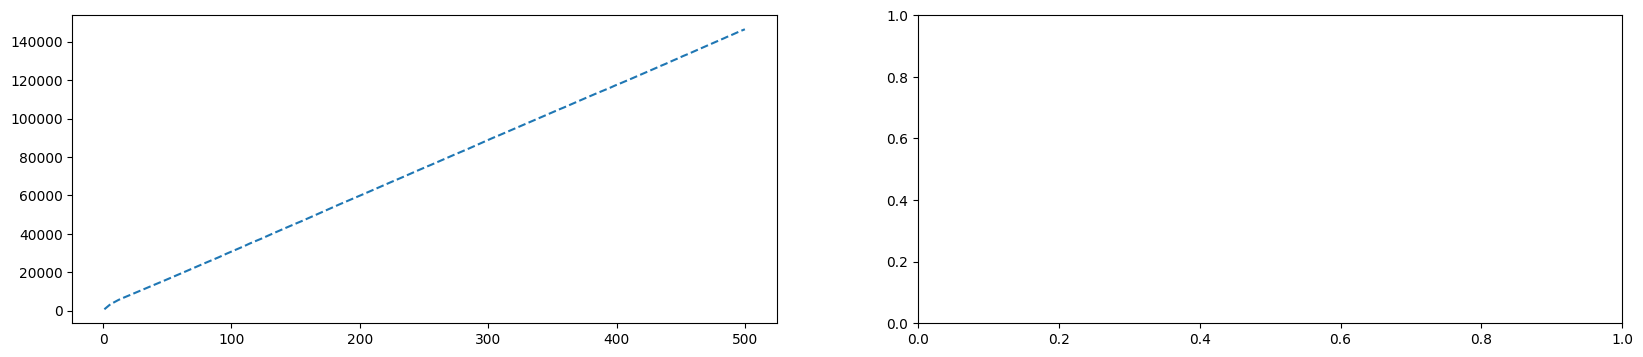

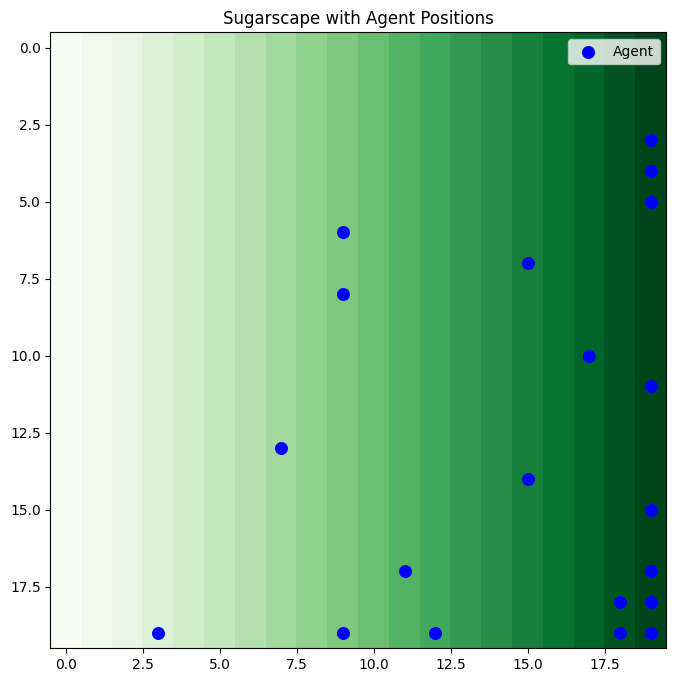

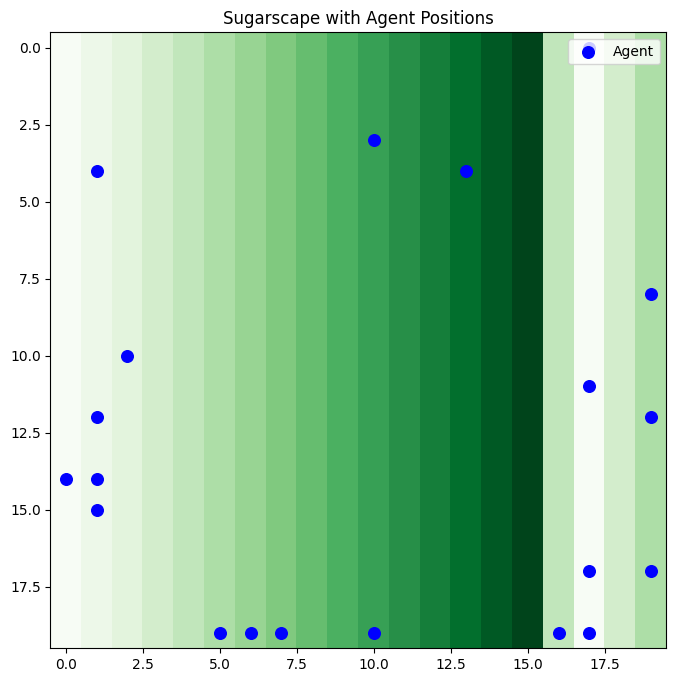

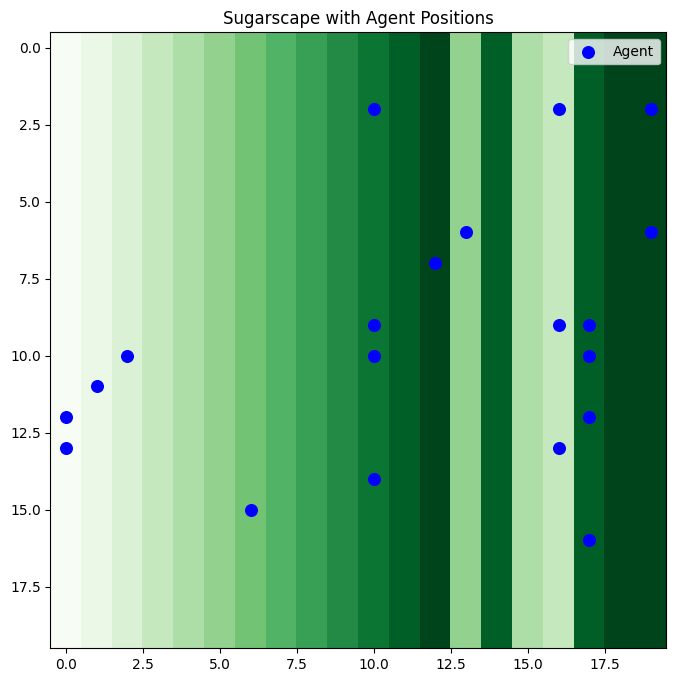

In [76]:
def plotEnergy():
    read_file = open('energy.csv')
    csv_reader = csv.reader(read_file)
    read_list1 = []
    read_list2 = []
    for row in csv_reader:
        # print(row)
        read_list1.append(int(row[0]))
        read_list2.append(int(row[1]))
    read_file.close()

    #combined_list = read_list1 + read_list2
    only_figure, (left_subplot, right_subplot) = plt.subplots(1, 2, figsize=(20, 4))
    left_subplot.plot(read_list1, read_list2, linestyle='--')



def plot2():
    read_file = open('positions.csv')
    csv_reader = csv.reader(read_file)
    pos_list = []
    sugar_level = []

    #Turn 1
    for row in csv_reader:
        pos_list.append((int(row[0]), int(row[1])))
    read_file.close()

    read_file = open('sugar.csv')
    csv_reader = csv.reader(read_file)
    for row in csv_reader:
        sugar_level.append(int(row[0]))
    read_file.close()

    plotSugar(pos_list[:20], sugar_level[:400])
    plotSugar(pos_list[20:40], sugar_level[400:800])
    plotSugar(pos_list[40:], sugar_level[800:])
    
plotEnergy()
plot2()


In [77]:
def plotSugar(agents, sugar_list):
    # Parameters for Sugarscape
    import numpy as np
    grid_size = 20  # 20x20 grid
    # sugar = (0, 10, (grid_size, grid_size))  # Random sugar levels
    # sugar = [[sugar_list[row,col] for col in range(grid_size)] for row in range(grid_size)]

    sugar = []
    for row in range (grid_size):
        sugar.append([])
        for col in range (grid_size):
            sugar[row].append(sugar_list[col])

    # Initialize agents with random positions
    agents = [{'x': pos[0], 'y': pos[1]} for pos in agents]

    # Function to visualize Sugarscape with agents
    def visualize_sugarscape_with_agents(sugar, agents):
        plt.figure(figsize=(8, 8))
        
        # Plot the heatmap with green colormap
        plt.imshow(sugar, cmap='Greens', origin='upper')
        
        # Overlay agent positions
        for agent in agents:
            plt.scatter(agent['y'], agent['x'], color='blue', s=70, label='Agent' if agent == agents[0] else "")
        
        plt.title("Sugarscape with Agent Positions")
        # plt.colorbar(label="Sugar Levels")
        plt.legend(loc='upper right')
        plt.show()

    # Visualize the Sugarscape and agents
    visualize_sugarscape_with_agents(sugar, agents)
